<a href="https://colab.research.google.com/github/Pranav8838/intern-task/blob/main/intern_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 - 8s - 21ms/step - accuracy: 0.9146 - loss: 0.2955 - val_accuracy: 0.9627 - val_loss: 0.1234
Epoch 2/10
375/375 - 11s - 29ms/step - accuracy: 0.9647 - loss: 0.1188 - val_accuracy: 0.9704 - val_loss: 0.0933
Epoch 3/10
375/375 - 5s - 14ms/step - accuracy: 0.9735 - loss: 0.0828 - val_accuracy: 0.9742 - val_loss: 0.0833
Epoch 4/10
375/375 - 7s - 18ms/step - accuracy: 0.9793 - loss: 0.0643 - val_accuracy: 0.9767 - val_loss: 0.0767
Epoch 5/10
375/375 - 10s - 28ms/step - accuracy: 0.9839 - loss: 0.0495 - val_accuracy: 0.9785 - val_loss: 0.0762
Epoch 6/10
375/375 - 9s - 23ms/step - accuracy: 0.9864 - loss: 0.0428 - val_accuracy: 0.9776 - val_loss: 0.0811
Epoch 7/10
375/375 - 10s - 28ms/step - accuracy: 0.9869 - loss: 0.0390 - val_accuracy: 0.9770 - val_loss: 0.0812
Epoch 8/10
375/375 - 7s - 18ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9787 - val_loss: 0.0807
Epoch 9/10
375/375 - 9s - 25ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9793 - val_lo

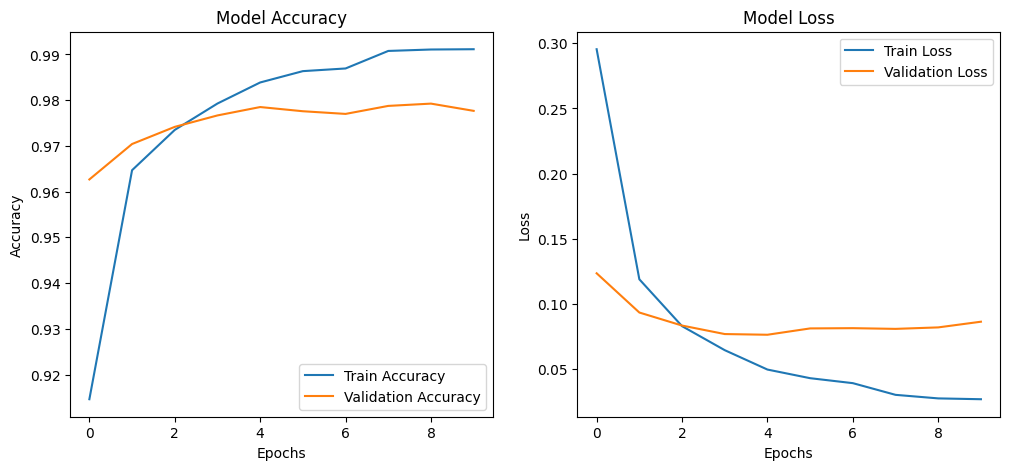

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load Dataset (MNIST is built-in with Keras)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (0–255 → 0–1)
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the MLP Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

# Step 6: Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Step 7: Plot Training History
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
